In [1]:
packages = !pip list
for x in packages:
    if "qiskit" in x:
        print(x)

qiskit                1.1.0
qiskit-aer            0.14.1
qiskit-ibm-runtime    0.23.0


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum",token="#")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

from qiskit_aer import AerSimulator
aer_sim = AerSimulator()

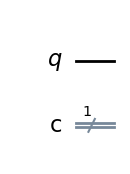

In [3]:
# Let's do an X-gate on a |0> qubit
# Initiating the qubit in |0> and visualizing it
qc = QuantumCircuit(1,1)
qc.draw('mpl')

In [4]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [5]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[1.+0.j 0.+0.j]

 Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


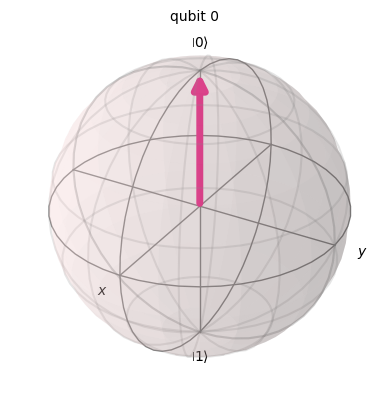

In [6]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

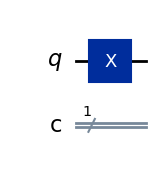

In [7]:
qc.x(0)
qc.draw('mpl')

In [8]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [9]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.+0.j 1.+0.j]

 Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


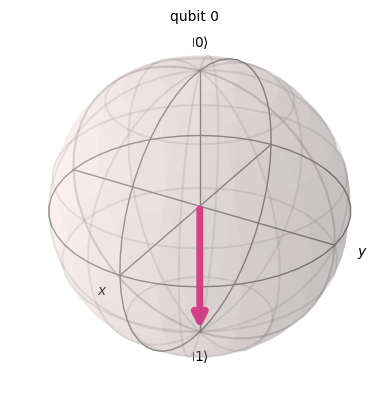

In [10]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [11]:
# from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

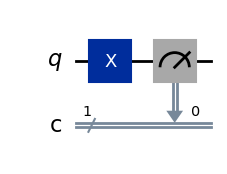

In [12]:
qc.measure([0], [0])
qc.draw('mpl')

In [13]:
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([qc]).result()

c:\Users\NFSBM\miniconda3\envs\qk_1.1\lib\site-packages\qiskit_ibm_runtime\session.py:157: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(
C:\Users\NFSBM\AppData\Local\Temp\ipykernel_5536\1952628133.py:2: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


In [14]:
result

SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 4000, 'simulator_metadata': {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0083345, 'sample_measure_time': 0.0019408, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 32547, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}}])

In [15]:
type(result)

qiskit.primitives.base.sampler_result.SamplerResult

In [16]:
dir(result)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_field_names',
 '_field_values',
 'metadata',
 'quasi_dists']

In [17]:
result.quasi_dists

[{1: 1.0}]

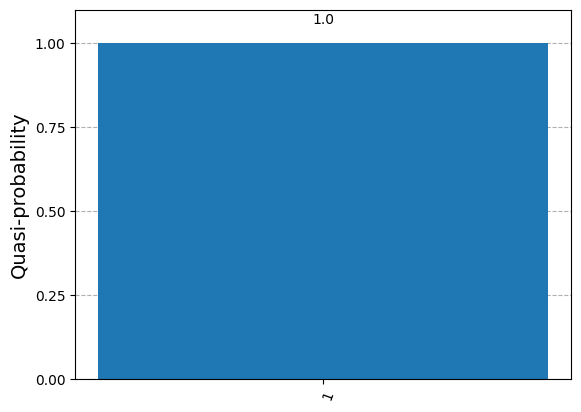

In [18]:
hist1 = plot_histogram(result.quasi_dists, sort='value_desc')
hist1

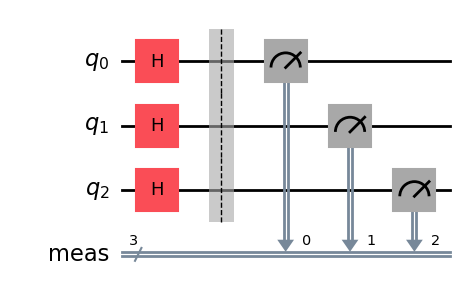

In [19]:
qc = QuantumCircuit(3) 
for qubit in range(3): 
    qc.h(qubit)
qc.measure_all()
qc.draw('mpl')

In [20]:
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([qc]).result()

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_5536\1952628133.py:2: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


In [21]:
result

SamplerResult(quasi_dists=[{0: 0.132, 1: 0.1375, 3: 0.115, 5: 0.122, 6: 0.12225, 2: 0.121, 4: 0.1225, 7: 0.12775}], metadata=[{'shots': 4000, 'simulator_metadata': {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 3, 'time_taken': 0.0288715, 'sample_measure_time': 0.0210384, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'max_memory_mb': 32547, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}}])

In [22]:
result.quasi_dists

[{0: 0.132, 1: 0.1375, 3: 0.115, 5: 0.122, 6: 0.12225, 2: 0.121, 4: 0.1225, 7: 0.12775}]

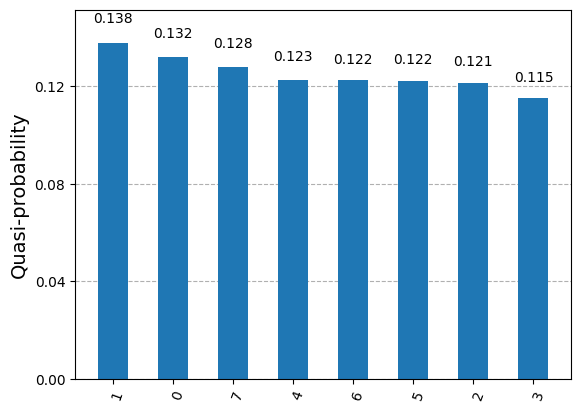

In [23]:
hist1 = plot_histogram(result.quasi_dists, sort='value_desc')
hist1

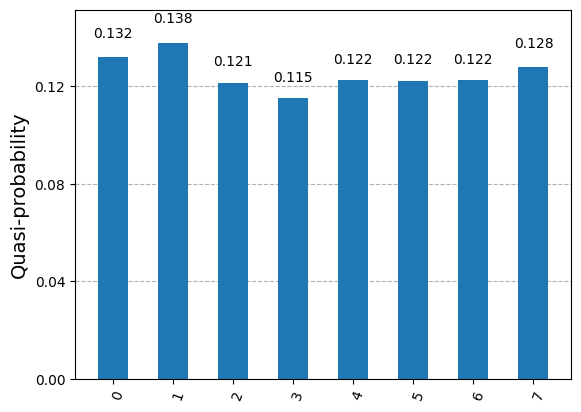

In [24]:
hist1 = plot_histogram(result.quasi_dists)
hist1

In [25]:
type(result.quasi_dists)

list

In [26]:
dir(result.quasi_dists)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [27]:
result.quasi_dists.index

<function list.index(value, start=0, stop=9223372036854775807, /)>